# Тестовое задание на вакансию Junior Data Analyst в Top Face

## Описание данных

* Campaign_id - ID кампании;
* Geo - геопозиция, на которую настроена рекламная кампания;
* Buyer - байер, выполнивший запуск;
* Impressions - количество показов рекламных объявлений;
* Clicks - количество кликов; 
* Installs - количество установок;
* Registrations - количество регистраций;
* Spend - Затраченная сумма;
* Revenue_ad (1d/7d/30d) - Выручка с рекламы от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни
* Revenue_in_app (1d/7d/30d) - Выручка с покупок от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни
* Payers (1d/7d/30d) - Количество покупателей в приложении на 1/7/30 день их жизни

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Предобработка

In [2]:
data = pd.read_csv(r'C:\Users\Anton\Downloads\test_data.csv', decimal= ',')
data.head()

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d
0,1,north america,buyer_1,3456974,129508,33054,21932,3208.440002,1163.521408,162.220001,64,1381.310062,199.749999,79,1527.013835,276.629998,83
1,2,north america,buyer_2,245542,6306,3401,2448,1569.519999,833.059639,37.250000,17,1200.964697,69.340001,19,1449.001828,120.250001,22
2,3,north america,buyer_1,1281103,35724,13315,8101,1231.999998,459.682600,3.260000,4,524.987826,24.700000,6,572.633765,24.700000,6
3,4,north america,buyer_1,215538,9987,3119,1857,1228.129999,602.778160,26.130000,11,830.113889,33.439999,12,1042.831595,57.530002,12
4,5,western europe,buyer_2,335878,7343,3952,2955,872.570005,427.807238,19.030001,4,577.039081,20.640001,5,714.554179,32.150001,6


In [3]:
data.dtypes

Campaign_id            int64
Geo                   object
Buyer                 object
Impressions            int64
Clicks                 int64
Installs               int64
Registrations          int64
Spend                float64
Revenue_ad1d         float64
Revenue_in_app1d     float64
Payers1d               int64
Revenue_ad7d         float64
Revenue_in_app7d     float64
Payers7d               int64
Revenue_ad30d        float64
Revenue_in_app30d    float64
Payers30d              int64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Campaign_id        87 non-null     int64  
 1   Geo                87 non-null     object 
 2   Buyer              87 non-null     object 
 3   Impressions        87 non-null     int64  
 4   Clicks             87 non-null     int64  
 5   Installs           87 non-null     int64  
 6   Registrations      87 non-null     int64  
 7   Spend              87 non-null     float64
 8   Revenue_ad1d       87 non-null     float64
 9   Revenue_in_app1d   87 non-null     float64
 10  Payers1d           87 non-null     int64  
 11  Revenue_ad7d       87 non-null     float64
 12  Revenue_in_app7d   87 non-null     float64
 13  Payers7d           87 non-null     int64  
 14  Revenue_ad30d      87 non-null     float64
 15  Revenue_in_app30d  87 non-null     float64
 16  Payers30d          87 non-nu

In [5]:
data.isnull().sum()

Campaign_id          0
Geo                  0
Buyer                0
Impressions          0
Clicks               0
Installs             0
Registrations        0
Spend                0
Revenue_ad1d         0
Revenue_in_app1d     0
Payers1d             0
Revenue_ad7d         0
Revenue_in_app7d     0
Payers7d             0
Revenue_ad30d        0
Revenue_in_app30d    0
Payers30d            0
dtype: int64

In [6]:
data.duplicated().sum()

0

### Выводы после просмотра данных:
Набор данных состоит из 87 строк, пропуски и дубликаты отстутсвуют, признаки с типом 'object' заменены на 'float32'

## Анализ
Компании из каких Geo показали себя хуже/лучше всех?
За метрику возьму Conversion rate или же конверсию

In [7]:
data.Geo.value_counts()

north america        48
western europe       22
cis                  10
latin america         3
north africa          2
tropical africa       1
australia oceania     1
Name: Geo, dtype: int64

In [8]:

NA = data.loc[data.Geo =='north america']
WE = data.loc[data.Geo =='western europe']
C = data.loc[data.Geo =='cis']
LA = data.loc[data.Geo =='latin america']
NA = data.loc[data.Geo =='north africa']
TA = data.loc[data.Geo =='tropical africa']
AO = data.loc[data.Geo =='australia oceania']
geos = [NA, WE, C, LA, NA, TA, AO]
geos_2 = ['NorthAm', 'WestEur', 'Cis', 'LatinAm', 'NorthAf', 'TropicAf', 'AustOcea']

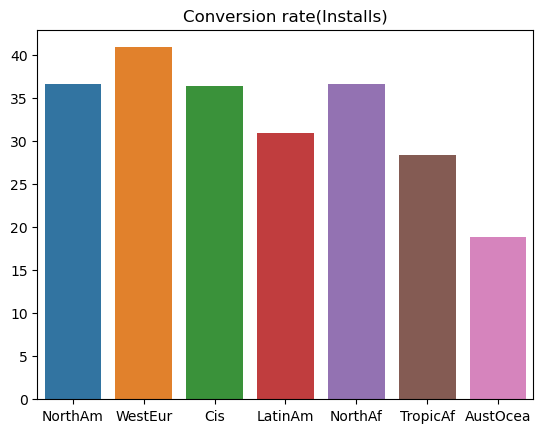

In [107]:
#Conversation Rate
CR_1=[]
CR_2=[]
for i in geos:
    CR_1.append(round((i.Installs/i.Clicks*100).mean(), 2))
for i in geos:
    CR_2.append(round((i.Registrations/i.Clicks*100).mean(), 2))
CR_2  

#Столбчатая диаграмма
sns.barplot(x=geos_2, y=CR_1).set_title('Conversion rate(Installs)')
plt.show()

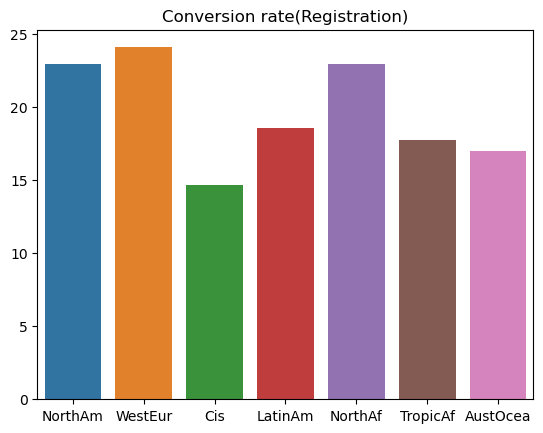

In [11]:
sns.barplot(x=geos_2, y=CR_2).set_title('Conversion rate(Registration)')
plt.show()

### Вывод
Самыми удачными по конверсии по установкам и регистрациям в среднем оказались Западная Европа, Северная Америка и Северная Африка, неудачные - Австралия и Океания, Тропическая африка


Возьмём еще одну метрику -  CTR(показатель кликабельности) и сравним компании по локации

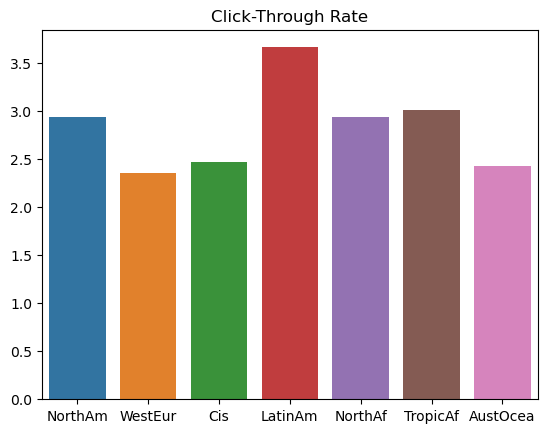

In [109]:
#Click-Through Rate
CTR = []
for i in geos:
    CTR.append(round((i.Clicks/i.Impressions*100).mean(), 2))
CTR

sns.barplot(x=geos_2, y=CTR).set_title('Click-Through Rate')
plt.show()

По показателю кликабельности лучше всего показала компания в латинской америке, далее в тропической африке и северной африке. 

Это говорит о том, что в эnих регионах чаще кликают yа рекламу, однако реже устанавливают и регистрируются в приложении в отличие от регионов "Северная Америка" и "Европа"

### ВОПРОС 2. Кто из медиабайеров лучше всего окупается? 

Для ответа на данных  вопрос обратимся к метрике ROMI - учитывает окупаемость только маркетинговых инвестиций 
 
ROMI = (Доходы от маркетинга - Расходы на маркетинг)/ Расходы на маркетинг * 100%

In [13]:
data.Buyer.value_counts()

buyer_2    39
buyer_1    18
buyer_4    16
buyer_5     8
buyer_3     6
Name: Buyer, dtype: int64

In [110]:
buyer_1 = data.loc[data.Buyer == 'buyer_1']
buyer_2 = data.loc[data.Buyer == 'buyer_2']
buyer_3 = data.loc[data.Buyer == 'buyer_3']
buyer_4 = data.loc[data.Buyer == 'buyer_4']
buyer_5 = data.loc[data.Buyer == 'buyer_5']
buyers = [buyer_1, buyer_2, buyer_3, buyer_4, buyer_5]
buyers_2 = ["b1", "b2", "b3", "b4", "b5"]

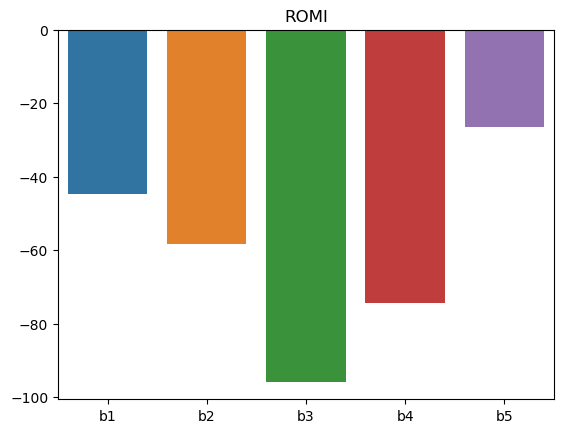

In [111]:
#ROMI
ROMI =[]
for i in buyers:
    ROMI.append(round(((i.Spend- i.Revenue_ad30d*100)/i.Spend).mean(), 2))
ROMI

sns.barplot(x=buyers_2, y=ROMI).set_title('ROMI')
plt.show()

Все медиабайеры оказались убыточными, однако можно заметить, что компании 5 и 1 байера показали наилучший результат по сравнению с другими

### ВОПРОС 3. У каких кампаний дешевле установки (CPI)?

CPI = затраты на рекламу / количество установок

In [105]:
CPI = data.Spend/data.Installs
CPI_frame = pd.DataFrame(data, columns = ['Campaign_id'])
CPI_frame['CPI'] = data.Spend/data.Installs
CPI_frame.nlargest(10, 'CPI')


,Campaign_id,CPI
80,81,2.155000
19,20,0.802027
36,37,0.755781
65,66,0.742162
53,54,0.703281
24,25,0.642301
57,58,0.637727
54,55,0.627887
51,52,0.623506
22,23,0.577878


Cамой удачной с точки зрения CPI оказалась рекламная компания с id 81, которая с отрывом опередила остальных со значением 2.15, что является очень хорошим результатом. В тройку успешных рекламных компаний вошли компании 20 и 37 со значением CPI - 0.80 и 0.75 соответственно.

In [115]:
print('---  Данные о рекламной компании id 81 ---') 
data.iloc[80]

---  Данные о рекламной компании id 81 ---


Campaign_id                         81
Geo                  australia oceania
Buyer                          buyer_5
Impressions                       2185
Clicks                              53
Installs                            10
Registrations                        9
Spend                        21.549999
Revenue_ad1d                  1.187304
Revenue_in_app1d                   0.0
Payers1d                             0
Revenue_ad7d                  1.212664
Revenue_in_app7d                   0.0
Payers7d                             0
Revenue_ad30d                 1.212664
Revenue_in_app30d                  0.0
Payers30d                            0
CPA                           0.406604
Name: 80, dtype: object

### CPA (стоимость целевого действия)

Рассмотрим ещё одну метрику маркетинга, дающую информацию о том, какова цена целевого действия: за целевое действия возьмём клики

In [96]:
#mean CPA
CPA = (data.Spend.mean()/data.Clicks.mean())
CPA = ((data.Spend/data.Clicks).mean())
print('Cредняя затрата на клики равна', round(CPA,3), 'y.e')

Cредняя затрата на клики равна 0.141 y.e


In [103]:
data['CPA']= ((data.Spend/data.Clicks))

dta = pd.DataFrame(data.groupby('Geo')['CPA'].mean())
dta

,CPA
Geo,
australia oceania,0.406604
cis,0.065580
latin america,0.025168
north africa,0.009742
north america,0.170227
tropical africa,0.015177
western europe,0.132621


### Вывод
Лидером по затратам на целевое действие является Автралия и океания, Северная Африка, в свою очередь, самый "дешевый" регион по этому критерию

## Общий Вывод

Исследовние предоставленного датасета выполнено. Проведены следующие этапы: 
- Предобработка
- Анализ данных с построением графиков
- Выводы 

Были рассчитаны такие маркенговые метрики как:
- Конверсия(CR)
- Показатель кликабельности(CTR)
- Окупаемость маркетинговых инвестиций(ROMI)
- CPI
- Стоимость целевого действия(клики)(CTA)